In [1]:
# init
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 전처리

In [2]:
# 1. 데이터 확인

data = pd.read_csv('./data/HR_data.csv')
data.head()

# test data load
test_data = pd.read_csv('./data/HR_data_test.csv')
test_data.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,201910001,0.38,0.53,2,157,3,0,0,sales,low
1,201910026,0.89,0.92,5,242,5,0,0,sales,low
2,201910029,0.41,0.46,2,128,3,0,0,accounting,low
3,201910030,0.38,0.50,2,132,3,0,0,accounting,low
4,201910046,0.84,0.74,3,182,4,0,0,technical,low


In [3]:
print(test_data.shape)

(2250, 10)


In [4]:
data['left'].value_counts()

0    9714
1    3035
Name: left, dtype: int64

c:\Users\zkdlx\miniconda3\envs\study3.6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\zkdlx\miniconda3\envs\study3.6\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\zkdlx\miniconda3\envs\study3.6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\zk

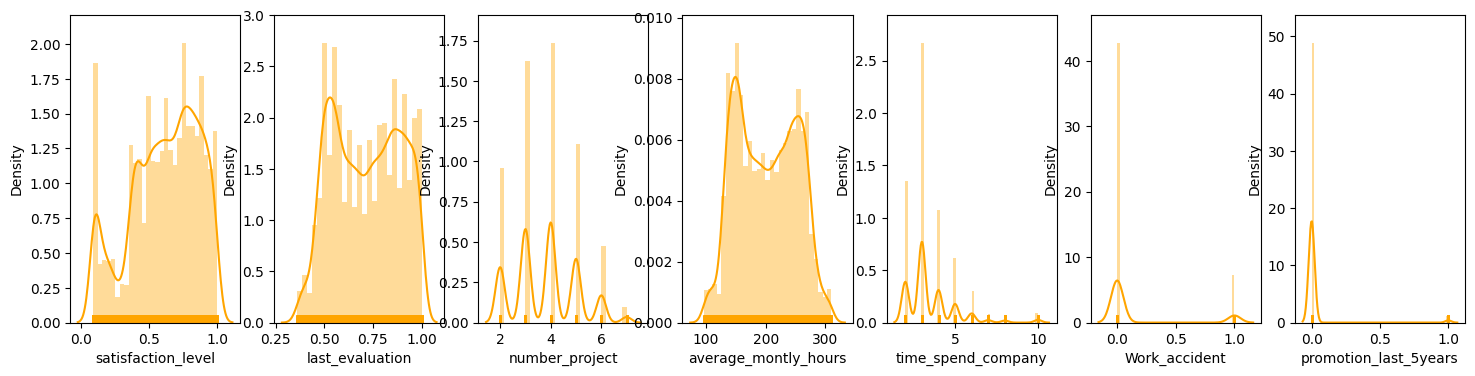

In [5]:
# 1-1. 데이터 분포 확인
fig, ax = plt.subplots(nrows = 1, ncols = 7, figsize = (18, 4))
#kde -> 분포 선(kernel density plot)을 그려줌 rug-> rugplot
for i in range(1,8):
    sns.distplot(data.iloc[:, i], ax = ax[i-1], color = 'orange', kde = True, rug = True)
plt.show()



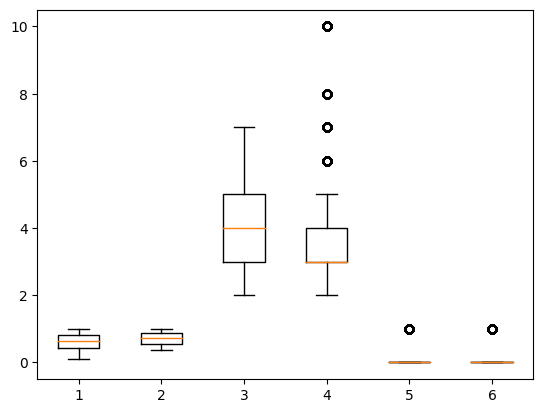

In [6]:
# 1-2. 데이터 이상치 확인
fig, ax = plt.subplots()
ax.boxplot([data["satisfaction_level"], data["last_evaluation"], data["number_project"], data["time_spend_company"], data["Work_accident"], data["promotion_last_5years"]])
plt.show()

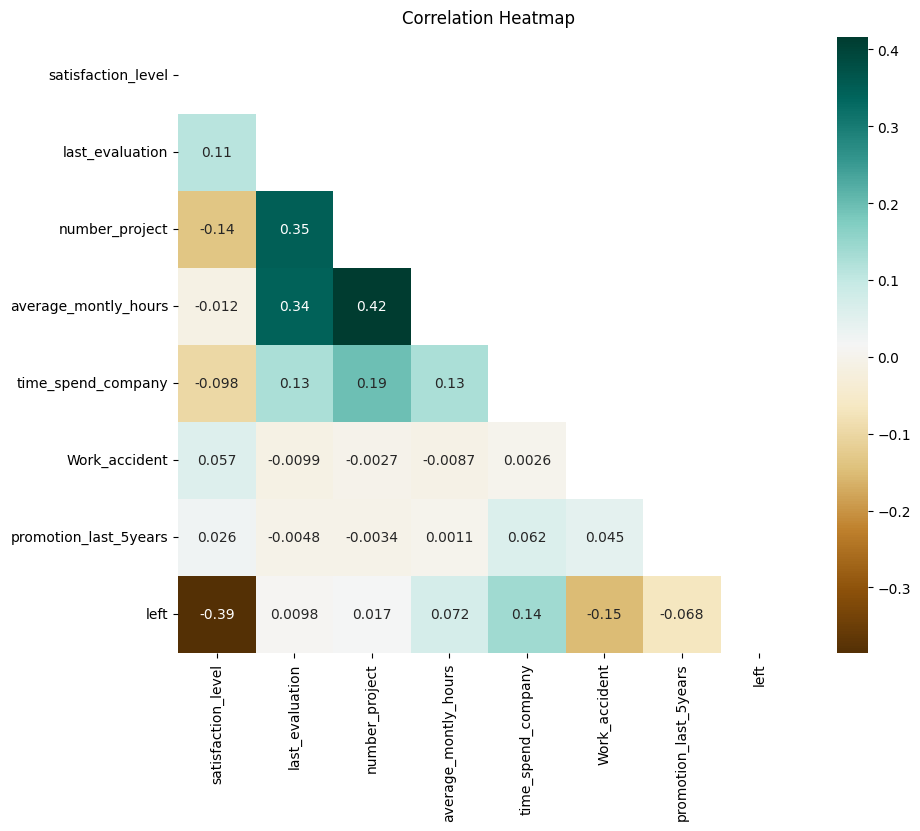

In [7]:
# 1-3. 데이터 상관관계 분석
data1 = data.drop(['ID', 'department', 'salary'], axis=1)

mask = np.triu(np.ones_like(data1.corr())) #upper tri 1로 바꾸기
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data1.corr(), #pearson corr
            annot=True, #셀의 값 표기 여부
            cmap="BrBG", #색깔 
            mask=mask
            )
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()

In [8]:
# 1.4 문자 데이터 변환
# department는 원핫 인코딩을 (변수간의 관계가 없기 때문에),
# salary는 레이블 인코딩을 사용한다.(low, medium, high 사이에 관계가 있기 때문에)

from sklearn.preprocessing import LabelEncoder

x = data.drop(['left'], axis=1)
y = data['left']

x = pd.get_dummies(data=x, columns=['department'])
test_data = pd.get_dummies(data=test_data, columns=['department'])

label_encoder = LabelEncoder()
x['salary'] = label_encoder.fit_transform(x['salary'])
test_data['salary'] = label_encoder.fit_transform(test_data['salary'])

x.head()



,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,201910002,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
1,201910003,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
2,201910004,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
3,201910005,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,201910006,0.41,0.50,2,153,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
print(x.shape)
print(test_data.shape)

(12749, 19)
(2250, 19)


In [10]:
# 1.5 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( 
    x,
    y,
    test_size=0.3,
    random_state=777
)

In [11]:
x_val.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
340,201910399,0.87,0.83,4,265,6,0,0,1,0,0,0,0,0,0,0,1,0,0
10700,201922598,0.11,0.90,6,263,4,0,0,1,1,0,0,0,0,0,0,0,0,0
12683,201924925,0.10,0.81,6,245,4,0,0,1,0,0,0,0,0,0,0,0,1,0
2677,201913120,0.61,0.92,4,159,5,0,0,2,1,0,0,0,0,0,0,0,0,0
6150,201917220,0.49,0.94,4,195,3,1,0,2,0,0,0,0,0,0,0,0,0,1


In [12]:
# 2. 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

# average_montly_hours에 대해 스케일링 실행

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

columns_to_scale = ['number_project', 'average_montly_hours', 'time_spend_company']
train_to_scale = x_train[columns_to_scale]
val_to_scale = x_val[columns_to_scale]
test_to_scale = test_data[columns_to_scale]

# 훈련 데이터 스케일링
x_train[columns_to_scale] = minmax_scaler.fit_transform(train_to_scale)

# val 데이터의 스케일링
x_val[columns_to_scale] = minmax_scaler.transform(val_to_scale)

# test 데이터의 스케일링
test_data[columns_to_scale] = minmax_scaler.transform(test_to_scale)

In [13]:
x_train.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
58,201910069,0.76,0.86,0.6,0.593458,0.375,1,0,2,0,0,0,0,0,0,1,0,0,0
2720,201913174,0.93,0.77,0.6,0.046729,0.375,0,0,2,0,0,0,0,0,0,0,0,0,1
10508,201922366,0.91,0.87,0.4,0.649533,0.375,0,0,1,0,0,0,0,0,0,0,0,0,1
11462,201923496,0.90,0.51,0.4,0.191589,0.500,0,0,2,0,0,0,0,0,0,0,1,0,0
2371,201912763,0.91,0.85,0.2,0.710280,0.125,0,0,2,0,0,0,0,0,0,0,1,0,0


In [14]:
x_val.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
340,201910399,0.87,0.83,0.4,0.789720,0.500,0,0,1,0,0,0,0,0,0,0,1,0,0
10700,201922598,0.11,0.90,0.8,0.780374,0.250,0,0,1,1,0,0,0,0,0,0,0,0,0
12683,201924925,0.10,0.81,0.8,0.696262,0.250,0,0,1,0,0,0,0,0,0,0,0,1,0
2677,201913120,0.61,0.92,0.4,0.294393,0.375,0,0,2,1,0,0,0,0,0,0,0,0,0
6150,201917220,0.49,0.94,0.4,0.462617,0.125,1,0,2,0,0,0,0,0,0,0,0,0,1


In [15]:
test_data.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,201910001,0.38,0.53,0.0,0.285047,0.125,0,0,1,0,0,0,0,0,0,0,1,0,0
1,201910026,0.89,0.92,0.6,0.682243,0.375,0,0,1,0,0,0,0,0,0,0,1,0,0
2,201910029,0.41,0.46,0.0,0.149533,0.125,0,0,1,0,0,1,0,0,0,0,0,0,0
3,201910030,0.38,0.50,0.0,0.168224,0.125,0,0,1,0,0,1,0,0,0,0,0,0,0
4,201910046,0.84,0.74,0.2,0.401869,0.250,0,0,1,0,0,0,0,0,0,0,0,0,1


In [16]:
print(x_train.shape)
print(x_val.shape)
print(test_data.shape)

(8924, 19)
(3825, 19)
(2250, 19)


In [17]:
# 3. 불균형 데이터 처리 

# 3.1 데이터 확인
print(y_train.value_counts())

0    6779
1    2145
Name: left, dtype: int64


In [18]:
# 3.2 오버샘플링 적용 (훈련데이터에만 적용해야함)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=777)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

y_train_over.value_counts()

0    6779
1    6779
Name: left, dtype: int64

In [19]:
x_train_over.shape

(13558, 19)

In [20]:
y_train_over.shape

(13558,)

In [21]:
x_val.shape

(3825, 19)

In [22]:
y_val.shape

(3825,)

In [23]:
y_val.value_counts()

0    2935
1     890
Name: left, dtype: int64

In [24]:
x_train_over

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,201910069,0.760000,0.860000,0.600000,0.593458,0.375000,1,0,2,0,0,0,0,0,0,1,0,0,0
1,201913174,0.930000,0.770000,0.600000,0.046729,0.375000,0,0,2,0,0,0,0,0,0,0,0,0,1
2,201922366,0.910000,0.870000,0.400000,0.649533,0.375000,0,0,1,0,0,0,0,0,0,0,0,0,1
3,201923496,0.900000,0.510000,0.400000,0.191589,0.500000,0,0,2,0,0,0,0,0,0,0,1,0,0
4,201912763,0.910000,0.850000,0.200000,0.710280,0.125000,0,0,2,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,201911569,0.407965,0.472035,0.000000,0.223267,0.125000,0,0,1,0,0,0,0,0,0,0,0,0,1
13554,201922750,0.726708,0.766554,0.291191,0.552211,0.397991,0,0,1,0,0,0,0,0,0,0,0,0,0
13555,201922211,0.405108,0.498479,0.000000,0.266355,0.125000,0,0,1,0,0,0,0,0,0,0,0,0,0
13556,201911960,0.370000,0.480000,0.000000,0.299065,0.125000,0,0,1,0,0,0,0,0,0,0,0,1,0


### 2. 모델링

In [25]:
# 0. shape 변경
    
x_train_over = x_train_over.to_numpy()
x_val = x_val.to_numpy()

x_train_reshaped = np.reshape(x_train_over, (x_train_over.shape[0], 1, x_train_over.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))
print(x_train_over.shape)
print(x_val.shape)

(13558, 19)
(3825, 19)


In [23]:
# 1. GRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout



gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(1,x_train_over.shape[1]), return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=60, activation="relu", return_sequences=True))
gru_model.add(Dropout(0.3))

gru_model.add(GRU(units=80, activation="relu", return_sequences=True))
gru_model.add(Dropout(0.4))

gru_model.add(GRU(units=120, activation="relu"))
gru_model.add(Dropout(0.5))

gru_model.add(Dense(units = 1, activation = 'sigmoid'))


gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
gru_model.fit(x_train_reshaped, y_train_over, epochs=10, batch_size=64, validation_data=(x_val_reshaped, y_val))

# Evaluate the model
loss, accuracy = gru_model.evaluate(x_val_reshaped, y_val)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


# predictions = gru_model.predict(x_val_reshaped)
# print(predictions)



Epoch 1/10
212/212 [==============================] - 9s 11ms/step - loss: 0.6936 - accuracy: 0.4973 - val_loss: 0.6978 - val_accuracy: 0.2327
Epoch 2/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6915 - val_accuracy: 0.7673
Epoch 3/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6870 - val_accuracy: 0.7673
Epoch 4/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4933 - val_loss: 0.6918 - val_accuracy: 0.7673
Epoch 5/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6968 - val_accuracy: 0.2327
Epoch 6/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6964 - val_accuracy: 0.2327
Epoch 7/10
212/212 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6898 - val_accuracy: 0.7673
Epoch

In [24]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 64)             16320     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 60)             22680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 80)             34080     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 80)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 120)               7

In [29]:
# 2. Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *


# RandomForestClassifier 모델 선언 후 Fitting
rfc = RandomForestClassifier(max_depth= 24, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 500)
rfc.fit(x_train_over, y_train_over)

# Fitting된 모델로 x_valid를 통해 예측을 진행
y_pred = rfc.predict(x_val)

acc = accuracy_score(y_val, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_val, y_pred)
print('precision_score : ', pre)

recall = recall_score(y_val, y_pred)
print('recall_score: ', recall)

accuracy_score :  0.996078431372549
precision_score :  0.996594778660613
recall_score:  0.9865168539325843


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [10, 100, 500, 1000],
           'max_depth' : [6, 8, 10, 12, 16, 20, 24, 28, 32],
           'min_samples_leaf' : [2, 4 ,8, 12, 18],
           'min_samples_split' : [2, 4, 8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
최고 예측 정확도: 0.9963


In [27]:
# 3. SVM
from sklearn.model_selection import GridSearchCV
# Parameter Grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(x_train_over, y_train_over)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'C': 0.1, 'gamma': 0.01}
Best Estimators:
 SVC(C=0.1, gamma=0.01)


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import *

 
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.01)
 
svm_model.fit(x_train_over, y_train_over) # SVM 분류 모델 훈련

y_pred = svm_model.predict(x_val)

acc = accuracy_score(y_val, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_val, y_pred)
print('precision_score : ', pre)

recall = recall_score(y_val, y_pred)
print('recall_score: ', recall)

accuracy_score :  0.9994771241830065
precision_score :  0.998876404494382
recall_score:  0.998876404494382


### 3. Test data 적용

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,201910001,0.38,0.53,2,157,3,0,0,sales,low
1,201910026,0.89,0.92,5,242,5,0,0,sales,low
2,201910029,0.41,0.46,2,128,3,0,0,accounting,low
3,201910030,0.38,0.50,2,132,3,0,0,accounting,low
4,201910046,0.84,0.74,3,182,4,0,0,technical,low


In [27]:
print(test_data)

             ID  satisfaction_level  last_evaluation  number_project  \
0     201910001                0.38             0.53             0.0   
1     201910026                0.89             0.92             0.6   
2     201910029                0.41             0.46             0.0   
3     201910030                0.38             0.50             0.0   
4     201910046                0.84             0.74             0.2   
...         ...                 ...              ...             ...   
2245  201924953                0.44             0.52             0.0   
2246  201924965                0.10             0.97             0.8   
2247  201924973                0.11             0.97             0.8   
2248  201924975                0.36             0.54             0.0   
2249  201924998                0.11             0.96             0.8   

      average_montly_hours  time_spend_company  Work_accident  \
0                 0.285047               0.125              0   
1    

In [28]:
# svm 사용
import collections

predict = svm_model.predict(test_data)
counter = collections.Counter(predict)

print(counter)

c:\Users\zkdlx\miniconda3\envs\study3.6\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Counter({0: 1712, 1: 538})


In [29]:
# 결과값 적용
import pprint


# test data load
new_result = pd.read_csv('./data/HR_data_test.csv')
new_result['left'] = predict

# counter = collections.Counter(new_result['left'])

# pprint.pprint(counter)

new_result.to_csv("result.csv", index=False)

In [30]:
new_result['left'].value_counts()

0    1712
1     538
Name: left, dtype: int64